# 5: DBScan

## 5.1: DBScan

DBSCAN has the ability to capture densely packed data points. It is similar to KNNs with variable parameters.

### Algorithm:

1) Choose two parameters, a positive numbers - epsilon and an integer minPoints.

2) Randomly pick few points from the dataset. If there are greater than minPoints within a radius of epsilon from that point, we consider all of them to be part of a "cluster". Note that eucledian distance is used here.

3) Expand that cluster by checking all of the unchecked new points and seeing if they have greater than minPoints within a radius of epsilon, growing the cluster recursively in this manner.

4) Eventually, we run out of points to add to the cluster. We then pick a new arbitrary point and repeat the process.

5) At the end of clustering, we could end up with data points not belonging to any cluster that we call noise. 

## Illustration

<img src='https://s3.amazonaws.com/rfjh/media/notebook-images/db-2.png'/>

Ref: https://en.wikipedia.org/wiki/DBSCAN

## DBScan using sklearn

We will have to specify epsilon and a natural number minPoints. Let us use values
epsilon =  0.09
and minPoints = 5.

```python
db = DBSCAN(eps=0.06, min_samples=5)
db.fit(X)
labels = db.labels_
```
<br/>
## Exercise:
 
 - Perform DBScan on the dataset and visualize the clusters

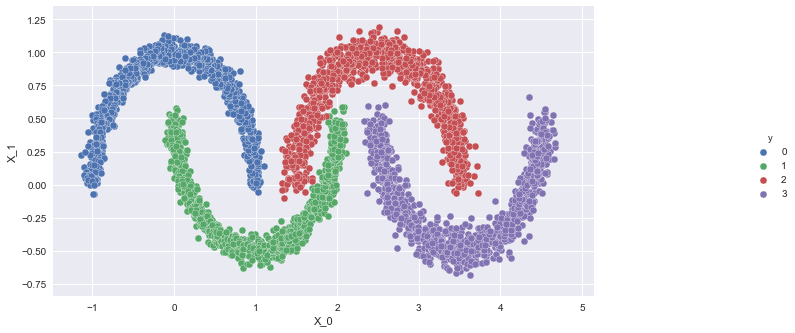

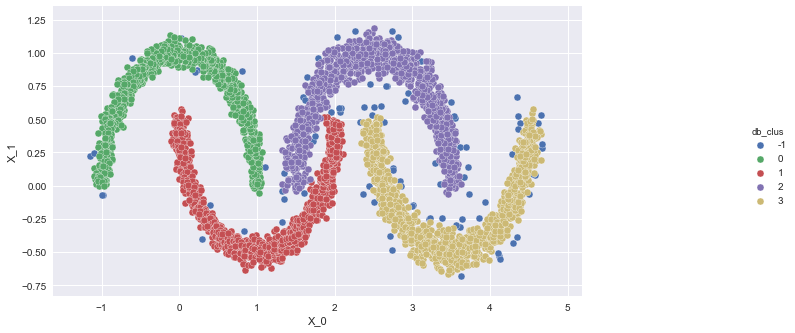

Good work you got it right!

In [3]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

import numpy as np
import seaborn as sns
import pandas as pd

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

N_Samples = 1000
D = 2
K = 4

X, y = make_moons(n_samples = 2*N_Samples, noise=0.05, shuffle = False)
x_vec, y_vec = make_moons(n_samples = 2*N_Samples, noise=0.08, shuffle = False)
x_vec[:,0] += 2.5
y_vec += 2
X = np.concatenate((X, x_vec), axis=0)
y = np.concatenate((y, y_vec), axis=0)

# Create a dataframe moon_df and visualize a graph g
moon_df = pd.DataFrame({'X_0':X[:,0],'X_1':X[:,1], 'y':y})
g = sns.pairplot(x_vars="X_0", y_vars="X_1", hue="y", data = moon_df)
g.fig.set_size_inches(14, 6)
sns.despine()

# Initialize a DBScan cluster with eps and minimum points
db = DBSCAN(eps=0.06, min_samples=5)

db.fit(X)
labels = db.labels_

# Create a data frame and visualize the plot.
moon_df['db_clus'] = labels
g=sns.pairplot(x_vars="X_0", y_vars="X_1", hue = "db_clus", data = moon_df)
g.fig.set_size_inches(14, 6)
sns.despine()


<br/><br/><br/>
## 5.2: Clustering Shapes

DBScan uses density based clustering and though it appears to determine various shapes, not always is it successful. Consider two intertwined circles with a high noise of 0.2. This dataset can be generated by make_circles function in the sklearn.datasets using a noise of 0.2.

<img src='https://s3.amazonaws.com/rfjh/media/CKEditorImages/2017/06/20/make_circles.png'/>

<br/>
## Exercise:

 - Use DBScan with eps of 0.5 to cluster the dataset and plot the results.
 - Assign the cluster labels to the variable labels.

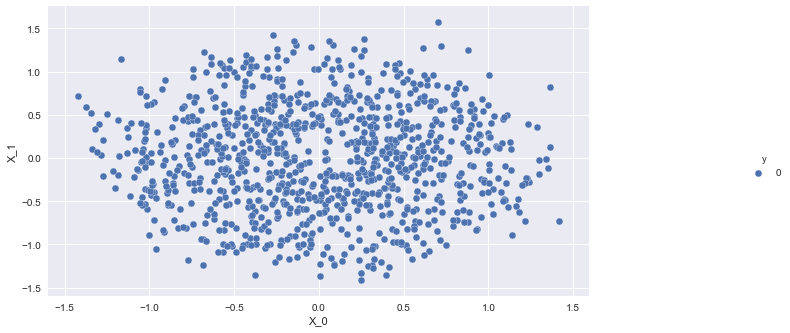

Good work you got it right!

In [7]:
from sklearn.datasets import make_circles

# Generate the dataset with intertwined circles
X, y = make_circles(n_samples=N_Samples, factor=.5, noise=.2)
noisy_circles = pd.DataFrame({'X_0':X[:,0],'X_1':X[:,1], 'y':y})

# Perform DBScan on the dataset and visualize the results
db = DBSCAN(eps=0.5, min_samples=5)

db.fit(X)
labels = db.labels_
noisy_circles = pd.DataFrame({'X_0':X[:,0], 'X_1':X[:,1], 'y':labels})
g = sns.pairplot(x_vars="X_0", y_vars="X_1", hue = "y", data = noisy_circles)
g.fig.set_size_inches(14, 6)
sns.despine()

In [8]:
ref_assert_var = False
import numpy as np

db_ = DBSCAN(eps=0.5, min_samples=5)
db_.fit(X)
if np.all(db_.labels_ == labels):
  ref_assert_var = True
  out = g
else:
  ref_assert_var = False


import re
variables_list = []
for k in dir():
    uvar = {}
    if not k.startswith('_') and k not in ["quit", "get_ipython", "exit", "In", "Out","variables_list", "uvar", "re", "utype", "k", "json_dict"]:
        v = eval(k)
        uvar["name"]=k
        uvar["value"]= str(v)
        utype = re.findall(r"'([^']*)'", str(type(v)))
        uvar["type"]= utype[0]
        variables_list.append(uvar)
import json
json_dict = json.dumps({"var_dict" : variables_list})
print(json_dict)


{"var_dict": [{"name": "D", "type": "int", "value": "2"}, {"name": "DBSCAN", "type": "type", "value": "<class 'sklearn.cluster.dbscan_.DBSCAN'>"}, {"name": "K", "type": "int", "value": "4"}, {"name": "N_Samples", "type": "int", "value": "1000"}, {"name": "X", "type": "numpy.ndarray", "value": "[[-0.55484876 -0.44642269]\n [-0.44201261 -0.0063676 ]\n [ 0.59731152  0.0208532 ]\n ..., \n [-0.42199993  0.27381094]\n [ 0.44807535  1.03566073]\n [ 0.26453163  0.30540603]]"}, {"name": "db", "type": "sklearn.cluster.dbscan_.DBSCAN", "value": "DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',\n    min_samples=5, n_jobs=1, p=None)"}, {"name": "db_", "type": "sklearn.cluster.dbscan_.DBSCAN", "value": "DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',\n    min_samples=5, n_jobs=1, p=None)"}, {"name": "g", "type": "seaborn.axisgrid.PairGrid", "value": "<seaborn.axisgrid.PairGrid object at 0x7f8cb43dd320>"}, {"name": "json", "type": "module", "value": "<module 'js